In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import torch
from torch_geometric.data import Data

In [2]:
df = pd.read_csv("data/sider.csv")
df.columns
df.head()
df.shape

(1427, 28)

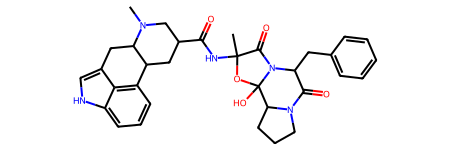

In [3]:
smi = df["smiles"][500]
mol = Chem.MolFromSmiles(smi)
mol

In [4]:
edges = []
for bond in mol.GetBonds():
    i = bond.GetBeginAtomIdx()
    j = bond.GetEndAtomIdx()
    edges.extend([(i,j), (j,i)])
edge_index = list(zip(*edges))

In [5]:
# Atomic number and chirality for atoms
# Bond type and bond direction for bonds
def atom_feature(atom):
    return [atom.GetAtomicNum(),
           atom.GetChiralTag()]
def bond_feature(bond):
    return [bond.GetBondType(),
           bond.GetBondDir()]

In [6]:
node_features = [atom_feature(a) for a in mol.GetAtoms()]
edge_features = [bond_feature(b) for b in mol.GetBonds()]

In [7]:
g = Data(edge_index=torch.LongTensor(edge_index),
         x=torch.FloatTensor(node_features),
         edge_attr=torch.FloatTensor(edge_features),
         smiles=smi,
         mol=mol)

In [8]:
g.x

tensor([[6., 0.],
        [6., 0.],
        [6., 0.],
        [8., 0.],
        [7., 0.],
        [6., 0.],
        [6., 0.],
        [8., 0.],
        [7., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [8., 0.],
        [8., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [7., 0.],
        [6., 0.],
        [8., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [7., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [6., 0.],
        [7., 0.],
        [6., 0.],
        [6., 0.]])

In [9]:
g.edge_attr

tensor([[ 1.,  0.],
        [ 1.,  0.],
        [ 2.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 2.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 2.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [12.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [12.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        [12.,  0.],
        [12.,  0.]])

In [10]:
print(len(g.x))
print(len(g.edge_attr))
print(g.edge_index)
# The first row of the tensor contains the origin of the bond, and second the target
print(g.edge_index.shape)

43
50
tensor([[ 0,  1,  1,  2,  2,  3,  2,  4,  4,  5,  5,  6,  6,  7,  6,  8,  8,  9,
          9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 13, 15,  5, 16, 16, 17, 17, 18,
         18, 19, 19, 20, 20, 21, 21, 22,  1, 23, 23, 24, 24, 25, 24, 26, 26, 27,
         27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36,
         36, 37, 37, 38, 38, 39, 29, 40, 40, 41, 40, 42, 14,  1, 13,  4, 12,  8,
         22, 17, 41, 26, 38, 28, 39, 31, 39, 34],
        [ 1,  0,  2,  1,  3,  2,  4,  2,  5,  4,  6,  5,  7,  6,  8,  6,  9,  8,
         10,  9, 11, 10, 12, 11, 13, 12, 14, 13, 15, 13, 16,  5, 17, 16, 18, 17,
         19, 18, 20, 19, 21, 20, 22, 21, 23,  1, 24, 23, 25, 24, 26, 24, 27, 26,
         28, 27, 29, 28, 30, 29, 31, 30, 32, 31, 33, 32, 34, 33, 35, 34, 36, 35,
         37, 36, 38, 37, 39, 38, 40, 29, 41, 40, 42, 40,  1, 14,  4, 13,  8, 12,
         17, 22, 26, 41, 28, 38, 31, 39, 34, 39]])
torch.Size([2, 100])


In [11]:
# Lets see without Torch
import numpy as np
from rdkit import Chem

edge_index = []
edge_features = []
node_features = []

for bond in mol.GetBonds():
    i = bond.GetBeginAtomIdx()
    j = bond.GetEndAtomIdx()
    
    # Building edge index
    edge_index.append([i, j])
    edge_index.append([j, i])

    # Extracting bond features
    bond_feats = [
        bond.GetBondType(),
        bond.GetBondDir()  
    ]
    edge_features.extend([bond_feats, bond_feats])  # Adding features for both directions of the edge

for atom in mol.GetAtoms():
    # Extracting node features
    atom_feats = [
        atom.GetAtomicNum(),
        #atom.GetChiralTag()   #For now we do without this; Seems to be 0 anyways for majority of cases
    ]
    node_features.append(atom_feats)

# Convert to numpy arrays
edge_index = (np.array(edge_index).T).astype(np.float32)  
edge_features = np.array(edge_features).astype(np.float32)
node_features = np.array(node_features).astype(np.float32)
print(edge_features)
print(node_features)
print(edge_index)

[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 2.  0.]
 [ 2.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 2.  0.]
 [ 2.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 2.  0.]
 [ 2.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [12.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [12.  0.]

In [12]:
from rdkit import Chem
import numpy as np

num_atoms = mol.GetNumAtoms()
# Adjacency matrix
A = np.zeros((num_atoms, num_atoms), dtype=int)

for bond in mol.GetBonds():
    i = bond.GetBeginAtomIdx()
    j = bond.GetEndAtomIdx()
    
    
    A[i, j] = 1
    A[j, i] = 1  

np.fill_diagonal(A, 1) # With this we have Ã = A + I
print(A)
print(A.shape)

[[1 1 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 0 1]]
(43, 43)


In [13]:
W = np.random.rand(num_atoms, num_atoms)
output = (A @ node_features).T @ W
np.maximum(0,output).T # Applying ReLU; This is what is getting used for the next iteration?
# I need to actually include edge features, and also update them

array([[469.40163078],
       [422.89073243],
       [445.46406882],
       [514.29102892],
       [426.16290076],
       [407.6529065 ],
       [410.87082706],
       [464.89502797],
       [504.42519968],
       [444.37043235],
       [431.87426946],
       [445.36773095],
       [428.85859272],
       [469.20566171],
       [511.86306798],
       [484.24642861],
       [427.01870705],
       [469.96835607],
       [519.89744913],
       [468.05004273],
       [478.66151388],
       [400.3613622 ],
       [412.40100673],
       [449.42421801],
       [560.02512141],
       [446.57839035],
       [519.76069806],
       [444.25218417],
       [474.02896305],
       [454.47445456],
       [433.60976435],
       [438.71216279],
       [438.17632735],
       [461.90169982],
       [405.34351907],
       [489.18144334],
       [512.94731942],
       [451.20462984],
       [461.5087033 ],
       [424.97247248],
       [449.75937806],
       [513.65442049],
       [461.40227525]])

In [14]:
# Perhaps we can actually have the adjacency matrix already including information about the edges
# such that we don't need to actually do the aggregating step (H = X + E) between node features,
# and edge features (as this in matrix form is complicated), and just revert to dot product
# between last H and A containing edge information. We'll also update this A.

from rdkit import Chem
import numpy as np

node_features = []
for atom in mol.GetAtoms():
    # Extracting node features
    atom_feats = [
        atom.GetAtomicNum(),
        #atom.GetChiralTag()   #For now we do without this; Seems to be 0 anyways for majority of cases
    ]
    node_features.append(atom_feats)
node_features = np.array(node_features).astype(np.float32)

num_atoms = mol.GetNumAtoms()
# Using only information about bond type for the respetive adjancency matrix
A = np.zeros((num_atoms, num_atoms), dtype=float)

for bond in mol.GetBonds():
    i = bond.GetBeginAtomIdx()
    j = bond.GetEndAtomIdx()
    bond_type = bond.GetBondType() 
    
    A[i, j] = bond_type
    A[j, i] = bond_type  

np.fill_diagonal(A, 1) # diagonal with 1's; Ã = A + I
A

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [15]:
W = np.random.rand(num_atoms, num_atoms)
output = (A @ node_features).T @ W
output_1 = np.maximum(0,output).T #Applying ReLU, might want to try sigmoid to place values between 0 and 1
print(output_1)

[[1493.35360479]
 [1630.99609971]
 [1626.44644012]
 [1493.58011085]
 [1440.71598861]
 [1677.38270022]
 [1492.91565108]
 [1485.57003939]
 [1462.1588621 ]
 [1367.66227559]
 [1327.70888613]
 [1334.6515873 ]
 [1678.85363822]
 [1700.67229939]
 [1709.56962135]
 [1144.35834866]
 [1662.80759545]
 [1591.96146442]
 [1490.60519658]
 [1778.86527709]
 [1299.60081982]
 [1582.91184602]
 [1138.82653859]
 [1749.73555367]
 [1311.8589572 ]
 [1590.72759809]
 [1506.57075785]
 [1774.97820172]
 [1349.94835942]
 [1532.35984954]
 [1668.69604312]
 [1507.11772537]
 [1325.85135524]
 [1394.75365257]
 [1393.24108983]
 [1655.49075923]
 [1750.02071818]
 [1603.04903439]
 [1584.60099302]
 [1820.05422545]
 [1612.69681659]
 [1330.20960901]
 [1492.30537499]]


In [16]:
A2 = A * (output_1 + output_1.T) # The idea is that at each entry of A
# for a certain edge between node i and j, we have information added based on past A
# and the node representations for i and j
# The update of A should be done after the update of H (node representations)
print(A2)
output_2 = np.maximum(0, (A2 @ output_1).T @ W)
print(output_2) #Yeah, need sigmoid ..

[[2986.70720959 3124.3497045     0.         ...    0.
     0.            0.        ]
 [3124.3497045  3261.99219941 3257.44253983 ...    0.
     0.            0.        ]
 [   0.         3257.44253983 3252.89288024 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ... 3225.39363319
  2942.9064256  3105.00219159]
 [   0.            0.            0.         ... 2942.9064256
  2660.41921801    0.        ]
 [   0.            0.            0.         ... 3105.00219159
     0.         2984.61074999]]
[[1.15294511e+09 1.27310285e+09 1.23507686e+09 1.12252026e+09
  1.14652674e+09 1.25246992e+09 1.13086289e+09 1.14405090e+09
  1.15058555e+09 1.03192618e+09 1.03370853e+09 1.01304440e+09
  1.27214432e+09 1.31568944e+09 1.31616475e+09 8.77559292e+08
  1.25723554e+09 1.22294928e+09 1.18205330e+09 1.37922949e+09
  9.70912528e+08 1.20192539e+09 8.72860216e+08 1.34330621e+09
  1.01492718e+09 1.23751113e+09 1.14028973e+09 1.36276416e+09
  1.06957556e+09 1.18537965

In [17]:
from Net import *
class CombinedMeanPooling(Layer):
    def __init__(self, transformed_vector_size):
        self.transformed_vector_size = transformed_vector_size

    def forward(self, node_vector, adjacency_matrix):
        pool_size = len(node_vector) // self.transformed_vector_size
        pooled_node_vector = [np.mean(node_vector[i * pool_size: (i + 1) * pool_size])
                              for i in range(self.transformed_vector_size)]

        pooled_adjacency_matrix = np.zeros((self.transformed_vector_size, self.transformed_vector_size))
        for i in range(self.transformed_vector_size):
            for j in range(self.transformed_vector_size):
                submatrix = adjacency_matrix[i * pool_size: (i + 1) * pool_size,
                                            j * pool_size: (j + 1) * pool_size]
                pooled_adjacency_matrix[i, j] = np.mean(submatrix)

        return pooled_node_vector, pooled_adjacency_matrix


    def backward(self):
        #Given that this is a first layer
        #And we have no learnable parameters, it shouldn't matter
        # to actually specify a backward pass
        pass
        


In [18]:
node_vector_size = len(node_features)
transformed_vector_size = 8
pool_size = 2


mean_pooling = CombinedMeanPooling(transformed_vector_size)
pooled_node_vector, pooled_adjacency_matrix = mean_pooling.forward(node_features, A)

print("Pooled Node Vector:")
print(pooled_node_vector)

print("\nPooled Adjacency Matrix:")
print(pooled_adjacency_matrix)
print(len(node_features))

Pooled Node Vector:
[6.6, 6.6, 6.4, 6.4, 6.2, 6.4, 6.2, 6.0]

Pooled Adjacency Matrix:
[[0.6  0.04 0.08 0.   0.04 0.   0.   0.  ]
 [0.04 0.6  0.08 0.04 0.   0.   0.   0.  ]
 [0.08 0.08 0.52 0.04 0.   0.   0.   0.  ]
 [0.   0.04 0.04 2.2  0.96 0.   0.   0.  ]
 [0.04 0.   0.   0.96 2.2  0.12 0.   0.  ]
 [0.   0.   0.   0.   0.12 0.44 0.04 0.04]
 [0.   0.   0.   0.   0.   0.04 3.16 1.44]
 [0.   0.   0.   0.   0.   0.04 1.44 4.04]]
43


In [19]:
from rdkit import Chem
import pandas as pd


data = pd.read_csv("data/sider.csv")

num_atoms_list = []
for mol_str in data["smiles"]:  
    mol = Chem.MolFromSmiles(mol_str)  
    if mol is not None:
        num_atoms = mol.GetNumAtoms()
        num_atoms_list.append(num_atoms)

average_num_atoms = sum(num_atoms_list) / len(num_atoms_list)

min_num_atoms = min(num_atoms_list)
molecules_with_min_atoms = [idx for idx, num_atoms in enumerate(num_atoms_list) if num_atoms == min_num_atoms]

print(f"Average number of atoms across all molecules: {average_num_atoms}")
print(f"Molecules with the lowest number of atoms ({min_num_atoms}): {molecules_with_min_atoms}")
# Might choose transformed_size for mean pooling as 8
# Will not consider any molecule with less than 8 atoms

[09:08:07] WARNING: not removing hydrogen atom without neighbors
[09:08:07] WARNING: not removing hydrogen atom without neighbors
[09:08:07] WARNING: not removing hydrogen atom without neighbors
[09:08:07] WARNING: not removing hydrogen atom without neighbors
[09:08:07] WARNING: not removing hydrogen atom without neighbors
[09:08:07] WARNING: not removing hydrogen atom without neighbors
[09:08:07] WARNING: not removing hydrogen atom without neighbors
[09:08:07] WARNING: not removing hydrogen atom without neighbors
[09:08:07] WARNING: not removing hydrogen atom without neighbors
[09:08:07] WARNING: not removing hydrogen atom without neighbors
[09:08:07] WARNING: not removing hydrogen atom without neighbors
[09:08:08] WARNING: not removing hydrogen atom without neighbors
[09:08:08] WARNING: not removing hydrogen atom without neighbors


Average number of atoms across all molecules: 33.641205325858444
Molecules with the lowest number of atoms (1): [41, 50, 51, 53, 59, 126, 136, 139, 148, 251, 424, 734, 740, 1300, 1311, 1352, 1353, 1354, 1355, 1356, 1361, 1363, 1364, 1365, 1366]


In [20]:
data = pd.read_csv("data/sider.csv")

total_molecules = len(data)
eliminated_molecules = 0

for mol_str in data["smiles"]:  
    mol = Chem.MolFromSmiles(mol_str)  
    if mol is not None:
        atom_count = mol.GetNumAtoms()

    
    if atom_count < 8:
        eliminated_molecules += 1

remaining_molecules = total_molecules - eliminated_molecules
print(remaining_molecules) #We'll use these ones

[09:08:08] WARNING: not removing hydrogen atom without neighbors
[09:08:08] WARNING: not removing hydrogen atom without neighbors
[09:08:08] WARNING: not removing hydrogen atom without neighbors
[09:08:08] WARNING: not removing hydrogen atom without neighbors
[09:08:08] WARNING: not removing hydrogen atom without neighbors
[09:08:08] WARNING: not removing hydrogen atom without neighbors
[09:08:08] WARNING: not removing hydrogen atom without neighbors
[09:08:08] WARNING: not removing hydrogen atom without neighbors
[09:08:08] WARNING: not removing hydrogen atom without neighbors
[09:08:08] WARNING: not removing hydrogen atom without neighbors
[09:08:08] WARNING: not removing hydrogen atom without neighbors
[09:08:08] WARNING: not removing hydrogen atom without neighbors
[09:08:08] WARNING: not removing hydrogen atom without neighbors


1352


In [21]:
# Testing GIN layer
input_size = 5  
H = np.random.randn(input_size)  
A = np.random.randn(input_size, input_size)

# Initialize GIN layer
gin_layer = GIN(input_size)

# Perform forward pass
H_output, A_output = gin_layer.forward(H, A)


print("H_output:\n", H_output)
print("A_output:\n", A_output)

H_output:
 [6.45642025 2.49742428 9.29207817 1.84028449 1.67689658]
A_output:
 [[ -8.70902377  -0.12573595  15.51656675   3.46230219   0.53995512]
 [ -0.77154361   4.0058555  -11.27805636 -11.10780933   0.83254133]
 [  7.59141268   6.62086375  11.83826557  -5.19041586  -3.53157594]
 [-25.9746568    9.56077321  -8.2441547  -10.24280893   1.77005127]
 [ -7.68786479  -4.38803483   3.75776363   5.49802438  -4.78800374]]


In [22]:
H = np.array([1, 2, 7, 5, 5, 6, 9, 9, 9, 10, 11, 12, 13, 14, 15])
A = np.random.rand(15, 15)
pooling_layer = Mean_pooling(size=10)

pooled_H, pooled_A = pooling_layer.forward(H, A)

print("Pooled H:", pooled_H)
print("Pooled A:", pooled_A)

Pooled H: [1.5, 6.0, 5.5, 9.0, 9.5, 6.0, 9.0, 9.0, 9.0, 10.0]
Pooled A: [[0.4087064  0.60458152 0.53890958 0.49470144 0.5424381  0.67128504
  0.29058149 0.69882139 0.65466099 0.43021522]
 [0.40812979 0.51127896 0.47501895 0.51056925 0.46581065 0.54404449
  0.3511121  0.6700264  0.52335208 0.40826923]
 [0.66806415 0.70706941 0.13315285 0.51754932 0.59377161 0.10522715
  0.58278891 0.45230972 0.51207867 0.67546456]
 [0.28014447 0.22534363 0.46362953 0.78721442 0.44266708 0.36788489
  0.7925176  0.78191123 0.41714269 0.46819147]
 [0.45664333 0.49397633 0.59834171 0.27120031 0.63269499 0.63264031
  0.31858296 0.22381765 0.81011296 0.45527701]
 [0.41617783 0.57163308 0.24543747 0.81907427 0.44678423 0.20591169
  0.91482128 0.72332726 0.18212626 0.71144219]
 [0.17197121 0.27027392 0.81080524 0.81827636 0.53992133 0.66504451
  0.87186259 0.76469013 0.56215392 0.51768873]
 [0.38831773 0.18041335 0.11645381 0.75615248 0.34541283 0.07072526
  0.71317262 0.79913233 0.27213146 0.41869421]
 [0.7064